In [1]:
import pandas as pd
from geofunctions import utils

In [2]:
import importlib
importlib.reload(utils)

<module 'geofunctions.utils' from '/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/geofunctions/utils.py'>

In [3]:
log_file = utils.get_path("raw","dwells",'file_monthly_info.txt')

# Read the log file
with open(log_file, 'r') as file:
    lines = file.readlines()

# Parse the lines into a list of dictionaries
data = []
for line in lines:
    # print(line)
    parts = line.strip().split(', ')
    entry = {}
    for part in parts:
        key, value = part.split(': ')
        entry[key.strip()] = value.strip()
    data.append(entry)

# Create a DataFrame
df = pd.DataFrame(data)



In [4]:

# Convert numerical columns to appropriate types
numeric_columns = ['Original Size', 'Original  Users', 'Filtered Size', 'Filtered Users']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col])

# Display the DataFrame
print(df)

     Month  Original Size  Original  Users  Filtered Size  Filtered Users
0   201901        1378596            62454        1003611           28019
1   201904         866364            52353         605429           27060
2   201907         901361            52388         638942           29114
3   201910         417015            35320         282033           13256
4   202101       10815299           597097        7345643          287693
..     ...            ...              ...            ...             ...
61  202102       10318208           532530        7681896          246889
62  202012          49259            46870            457              91
63  202309        8856333           579055        7246089          358551
64  202306       14160487           275591       12216229          222053
65  202309        8856333           579055        7246089          358551

[66 rows x 5 columns]


In [5]:
df = df.groupby("Month").max()

In [14]:
import matplotlib.pyplot as plt

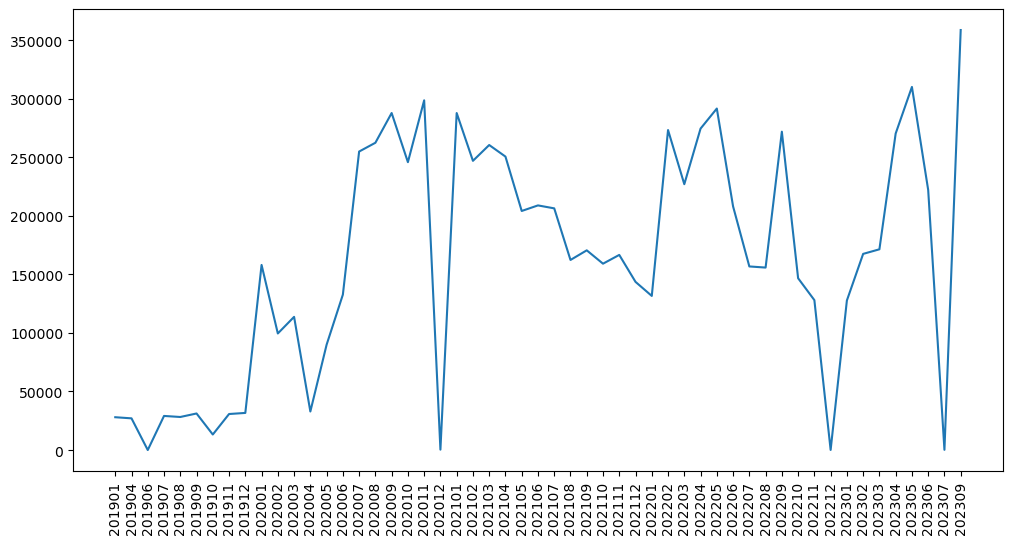

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df["Filtered Users"])
plt.xticks(rotation='vertical');

# Select list of months  that we use for analysis

In [16]:
list_month_ok = df[df["Filtered Users"]>30000].index
list_month_ok

Index(['201909', '201911', '201912', '202001', '202002', '202003', '202004',
       '202005', '202006', '202007', '202008', '202009', '202010', '202011',
       '202101', '202102', '202103', '202104', '202105', '202106', '202107',
       '202108', '202109', '202110', '202111', '202112', '202201', '202202',
       '202203', '202204', '202205', '202206', '202207', '202208', '202209',
       '202210', '202211', '202301', '202302', '202303', '202304', '202305',
       '202306', '202309'],
      dtype='object', name='Month')

## Israel lockdowns: 
1. First Lockdown:
    - Start: March 19, 2020
    - End: May 4, 2020 (gradual easing began in late April 2020)
2. Second Lockdown:
    - Start: September 18, 2020
    - End: October 18, 2020 (restrictions were gradually lifted after this date)
3. Third Lockdown:
    - Start: December 27, 2020
    - End: February 7, 2021 (some restrictions eased in stages after this date)







In [10]:
precovid_months = ['201909', '201911', '201912', '202001']
covid_months = ['202003','202004', '202005','202009','202010','202101']
postcovid_months = ['202104', '202107', '202110', '202201', '202204','202207','202210','202301','202304','202309']

## Run home location script for selected months

In [4]:
import subprocess

for month in precovid_months[-1:]:
    print(month)
    subprocess.run(['python', '001-home-location-monthly.py', '--month', month])

202001
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202001, num_homes:38851,
      corr_pop_homes:0.5895390695924843,
      spatial_variance:3.4324943616243564,
        share home dwells in work hours:0.4091785048470737, 
        share remote work of all home_days:0.5572943291508572, 
        share remote work of all work days:0.5052732228289236,
        share home hours in home dwells:0.49589059529174245
        frequent users:45336



In [5]:
for month in covid_months:
    print(month)
    subprocess.run(['python', '001-home-location-monthly.py', '--month', month])

202003
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202003, num_homes:16167,
      corr_pop_homes:0.6186354491219327,
      spatial_variance:3.1869120429163584,
        share home dwells in work hours:0.49917771899350916, 
        share remote work of all home_days:0.4798959812500815, 
        share remote work of all work days:0.5830775506851276,
        share home hours in home dwells:0.528379581970294
        frequent users:18079

202004
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202004, num_homes:4149,
      corr_pop_homes:0.5706695768233173,
      spatial_variance:0.3902405198295629,
        share home dwells in work hours:0.6360452611096283, 
        share remote work of all home_days:0.48374931422265877, 
        share remote work of all work days:0.6954589233923588,
        share home hours in home dwells:0.5455961783063731
        frequent users:3568

202005
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202005, num_homes:50197,
      corr_pop_homes:0.5921950686697,
      spatial_variance:1.9711776364921758,
        share home dwells in work hours:0.4992757645791584, 
        share remote work of all home_days:0.06313838732703028, 
        share remote work of all work days:0.5292431527204373,
        share home hours in home dwells:0.9065431415308535
        frequent users:5046

202009
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202009, num_homes:90685,
      corr_pop_homes:0.6600447038104752,
      spatial_variance:1.6324788505375951,
        share home dwells in work hours:0.6291276521273166, 
        share remote work of all home_days:0.4434991223245374, 
        share remote work of all work days:0.6776510187943465,
        share home hours in home dwells:0.6459792812905892
        frequent users:97642

202010
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202010, num_homes:68973,
      corr_pop_homes:0.6235457439274045,
      spatial_variance:1.239297681791179,
        share home dwells in work hours:0.665624020600954, 
        share remote work of all home_days:0.4278587145991835, 
        share remote work of all work days:0.7065854728470123,
        share home hours in home dwells:0.7920521456151113
        frequent users:67449

202101
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202101, num_homes:64644,
      corr_pop_homes:0.6569244744466534,
      spatial_variance:1.280432221460197,
        share home dwells in work hours:0.4819671054220095, 
        share remote work of all home_days:0.18601535956082926, 
        share remote work of all work days:0.548297345744302,
        share home hours in home dwells:0.6960051222199712
        frequent users:40584



In [ ]:
for month in postcovid_months:
    print(month)
    subprocess.run(['python', '001-home-location-monthly.py', '--month', month])

202104
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202104, num_homes:29830,
      corr_pop_homes:0.6335619621617306,
      spatial_variance:3.5946537684534574,
        share home dwells in work hours:0.4603483922595468, 
        share remote work of all home_days:0.5109820913219729, 
        share remote work of all work days:0.5262612606229585,
        share home hours in home dwells:0.5113619605315106
        frequent users:34671

202107
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202107, num_homes:19886,
      corr_pop_homes:0.5374192517618002,
      spatial_variance:3.6010115511751146,
        share home dwells in work hours:0.4531033140091926, 
        share remote work of all home_days:0.3864698910548739, 
        share remote work of all work days:0.4848051978855531,
        share home hours in home dwells:0.5387757362104709
        frequent users:25811

202110
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202110, num_homes:9797,
      corr_pop_homes:0.49768104838465427,
      spatial_variance:2.8689961627676253,
        share home dwells in work hours:0.42541098410813455, 
        share remote work of all home_days:0.3177749824780369, 
        share remote work of all work days:0.4428627847814404,
        share home hours in home dwells:0.6179208779973029
        frequent users:9977

202201
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202201, num_homes:28335,
      corr_pop_homes:0.5650895968543255,
      spatial_variance:5.187331533564305,
        share home dwells in work hours:0.4599836952403631, 
        share remote work of all home_days:0.4869656260669246, 
        share remote work of all work days:0.5582470005589228,
        share home hours in home dwells:0.576297576515627
        frequent users:29667

202204
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202204, num_homes:32958,
      corr_pop_homes:0.5999022576805697,
      spatial_variance:3.2359881018967567,
        share home dwells in work hours:0.4537156327942074, 
        share remote work of all home_days:0.39086297755413735, 
        share remote work of all work days:0.509383616629245,
        share home hours in home dwells:0.5709183838305232
        frequent users:31414

202207
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202207, num_homes:72153,
      corr_pop_homes:0.5666285627253438,
      spatial_variance:5.433785206067226,
        share home dwells in work hours:0.4356340218999275, 
        share remote work of all home_days:0.38027170758118295, 
        share remote work of all work days:0.5038011954321641,
        share home hours in home dwells:0.5953348935204534
        frequent users:70838

202210
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202210, num_homes:59249,
      corr_pop_homes:0.558376279176932,
      spatial_variance:7.2720865003150035,
        share home dwells in work hours:0.3874987390057807, 
        share remote work of all home_days:0.3124481045085536, 
        share remote work of all work days:0.446935055286245,
        share home hours in home dwells:0.6374578434787203
        frequent users:61242

202301
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202301, num_homes:65689,
      corr_pop_homes:0.5686795185307509,
      spatial_variance:8.43036553423075,
        share home dwells in work hours:0.443726342826498, 
        share remote work of all home_days:0.3641765826831719, 
        share remote work of all work days:0.5015661434404262,
        share home hours in home dwells:0.6664466648098357
        frequent users:70018

202304
Parsed WKB to geometry
read file successfully
top 5 geohashes left for user
exploded table by hours
selected home locations


/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py:260: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(utils.spatial_variance)


start saving results
Month: 202304, num_homes:49130,
      corr_pop_homes:0.5581599841087765,
      spatial_variance:6.765447643651397,
        share home dwells in work hours:0.409696040417885, 
        share remote work of all home_days:0.364951529125256, 
        share remote work of all work days:0.4794732395687793,
        share home hours in home dwells:0.6511750258065532
        frequent users:41371

202309


Traceback (most recent call last):
  File "/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/020-process-dwells/001-home-location-monthly.py", line 64, in <module>
    df_filtered_good = pd.read_parquet(f"{path_dir}/data_filtered_{MONTH}.parquet")
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/envs/spatial_analytics_course/lib/python3.12/site-packages/pandas/io/parquet.py", line 667, in read_parquet
    return impl.read(
           ^^^^^^^^^^
  File "/opt/homebrew/anaconda3/envs/spatial_analytics_course/lib/python3.12/site-packages/pandas/io/parquet.py", line 267, in read
    path_or_handle, handles, filesystem = _get_path_or_handle(
                                          ^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/envs/spatial_analytics_course/lib/python3.12/site-packages/pandas/io/parquet.py", line 140, in _get_path_or_handle
    handles = get_handle(
              ^^^^^^^^^^^
  File

## Now we run the rest months

In [8]:
list_month_ok = ['201909', '201911', '201912', '202001', '202002', '202003', '202004',
       '202005', '202006', '202007', '202008', '202009', '202010', '202011',
       '202101', '202102', '202103', '202104', '202105', '202106', '202107',
       '202108', '202109', '202110', '202111', '202112', '202201', '202202',
       '202203', '202204', '202205', '202206', '202207', '202208', '202209',
       '202210', '202211', '202301', '202302', '202303', '202304', '202305',
       '202306', '202309']

In [12]:
rest_months = [i for i in list_month_ok if i  not in precovid_months and i not in covid_months and i not in postcovid_months]

In [ ]:
for month in rest_months:
    print(month)
    subprocess.run(['python', '001-home-location-monthly.py', '--month', month])

202002
Parsed WKB to geometry
read file successfully
